**Importing Libraries**

In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Adding the Dataset**

In [ ]:
file = "/content/drive/MyDrive/countrybrandingdatafeb162024.xlsx"
df_gdp = pd.read_excel(file, sheet_name="DV GDP_PPP", index_col=0)
df_iv = pd.read_excel(file, sheet_name="IVs factors")

In [ ]:
df_gdp

,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,
Algeria,11685.451418,11809.483033,12007.774713,12120.406374,11452.226624,12170.193777,13209.596769
Argentina,20307.870052,23597.117753,23294.098675,23007.836592,20787.857871,23754.361390,26504.590562
Australia,47249.434815,48400.245788,50192.957328,51909.015102,53066.490989,55947.052228,62625.357642
Austria,52684.017113,54172.986789,56937.944283,59704.223378,57258.690227,59962.827052,67935.847974
Azerbaijan,14371.022741,14121.406936,14551.200114,15054.544607,14495.656972,15927.210148,17764.445589
...,...,...,...,...,...,...,...
United States,57866.744934,59907.754261,62823.309438,65120.394663,63528.634303,70219.472454,76398.591742
Uruguay,22618.691776,23384.740189,23950.393329,24551.746168,23309.786523,25663.410607,28841.985700
Uzbekistan,6796.904892,6840.709860,7289.329501,7717.744117,7822.661958,8607.527450,9532.511865


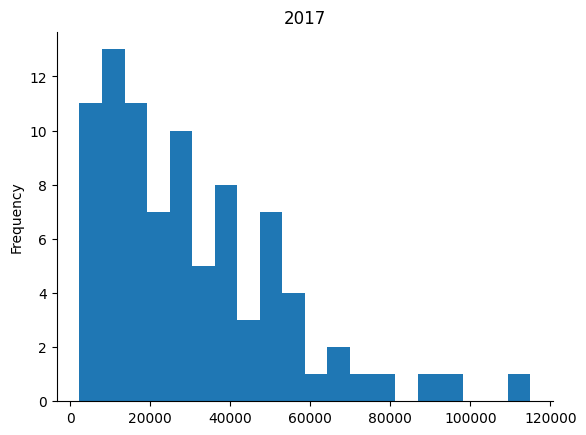

In [ ]:
# @title 2017

from matplotlib import pyplot as plt
df_gdp[2017].plot(kind='hist', bins=20, title=2017)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_iv

,Year,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,2016,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,2016,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393
2,2016,Australia,70.436610,90.764070,90.823771,53.479153,68.656392,70.613007,24.834436,32.117963,51.123450,94.910648
3,2016,Austria,59.247783,73.448695,77.106312,37.663487,66.337010,35.716511,8.974374,49.510705,11.188092,71.207580
4,2016,Azerbaijan,1.671710,3.159704,1.539496,1.715254,37.746434,4.412014,4.836940,3.070438,35.930836,5.499866
...,...,...,...,...,...,...,...,...,...,...,...,...
531,2022,United Kingdom,86.403834,79.628540,71.896213,79.536933,57.484105,37.370709,79.486629,61.468108,12.414818,92.401812
532,2022,United States,99.731665,53.158975,46.652274,88.762082,50.844166,42.357155,100.000000,51.392052,32.391377,97.120787
533,2022,Uruguay,4.627600,8.667226,11.255599,5.586681,58.730005,22.914893,1.102120,10.347474,3.043958,9.849606
534,2022,Uzbekistan,1.587867,0.495599,2.033508,0.655587,41.598282,4.545857,5.683174,1.538895,12.631457,0.486885


In [ ]:
#Yearly GDP _PPP with country factor scores
for year in df_gdp.columns:
  for country in df_gdp.index:
    df_iv.loc[(df_iv['Brand'] == country) & (df_iv['Year'] == year), 'gdp'] = df_gdp.loc[ country, year]

In [ ]:
df_iv

,Year,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL,gdp
0,2016,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000,11685.451418
1,2016,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393,20307.870052
2,2016,Australia,70.436610,90.764070,90.823771,53.479153,68.656392,70.613007,24.834436,32.117963,51.123450,94.910648,47249.434815
3,2016,Austria,59.247783,73.448695,77.106312,37.663487,66.337010,35.716511,8.974374,49.510705,11.188092,71.207580,52684.017113
4,2016,Azerbaijan,1.671710,3.159704,1.539496,1.715254,37.746434,4.412014,4.836940,3.070438,35.930836,5.499866,14371.022741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2022,United Kingdom,86.403834,79.628540,71.896213,79.536933,57.484105,37.370709,79.486629,61.468108,12.414818,92.401812,54602.544380
532,2022,United States,99.731665,53.158975,46.652274,88.762082,50.844166,42.357155,100.000000,51.392052,32.391377,97.120787,76398.591742
533,2022,Uruguay,4.627600,8.667226,11.255599,5.586681,58.730005,22.914893,1.102120,10.347474,3.043958,9.849606,28841.985700
534,2022,Uzbekistan,1.587867,0.495599,2.033508,0.655587,41.598282,4.545857,5.683174,1.538895,12.631457,0.486885,9532.511865


In [ ]:
#Check if any missing values
df_iv.isna().sum()

Year                   0
Brand                  0
ENTREPRENEURSHIP       0
QUALITY OF LIFE        0
SOCIAL PURPOSE         0
CULTURAL INFLUENCE     0
OPEN FOR BUSINESS      0
ADVENTURE              0
POWER                  0
HERITAGE               0
MOVERS                 0
OVERALL                0
gdp                   29
dtype: int64

In [ ]:
#Filled the missing values with Mean method
df_iv['gdp'].fillna(df_iv['gdp'].mean(), inplace=True)

In [ ]:
df_iv.isna().sum()

Year                  0
Brand                 0
ENTREPRENEURSHIP      0
QUALITY OF LIFE       0
SOCIAL PURPOSE        0
CULTURAL INFLUENCE    0
OPEN FOR BUSINESS     0
ADVENTURE             0
POWER                 0
HERITAGE              0
MOVERS                0
OVERALL               0
gdp                   0
dtype: int64

In [ ]:
df_iv.columns

Index(['Year', 'Brand', 'ENTREPRENEURSHIP', 'QUALITY OF LIFE',
       'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 'OPEN FOR BUSINESS',
       'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS', 'OVERALL', 'gdp'],
      dtype='object')

In [ ]:
main_cols= ['ENTREPRENEURSHIP', 'QUALITY OF LIFE',
       'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 'OPEN FOR BUSINESS',
       'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS']

In [ ]:
X= df_iv[main_cols]

In [ ]:
y = df_iv['gdp']

In [ ]:
X.shape, y.shape

((536, 9), (536,))

In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
#Performed OLS to find out which factor is most important
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     70.51
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           1.29e-84
Time:                        21:18:32   Log-Likelihood:                -5955.0
No. Observations:                 536   AIC:                         1.193e+04
Df Residuals:                     526   BIC:                         1.197e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.134e+04   3098.885     10.113      0.000    2.53e+04    3.74e+04
ENTREPRENEURSHIP     604.3372    119.020      5.078      0.000     370.525     838.150
QUALITY OF LIFE       71.6191    143.694      0.498      0.618    -210.666     353.904
SOCIAL PURPOSE       -98.6512    105.322     -0.937      0.349    -305.554     108.251
CULTURAL INFLUENCE   456.0567     93.654      4.870      0.000     272.075     640.039
OPEN FOR BUSINESS    -34.5909     65.054     -0.532      0.595    -162.388      93.206
ADVENTURE           -167.1294     64.052     -2.609      0.009    -292.959     -41.300
POWER               -413.1079     67.764     -6.096      0.000    -546.230    -279.986
HERITAGE            -288.3826     49.194     -5.862      0.000    -385.024    -191.741
MOVERS               -17.9133     43.065     -0.416      0.678    -102.515      66.688
==============================================================================
Omnibus:                      173.512   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.618
Skew:                           1.492   Prob(JB):                    7.59e-130
Kurtosis:                       7.209   Cond. No.                         480.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
absolute_coefficients = model.params.abs()
# Print or inspect the absolute coefficients
display(absolute_coefficients)

const                 31340.331993
ENTREPRENEURSHIP        604.337245
QUALITY OF LIFE          71.619118
SOCIAL PURPOSE           98.651243
CULTURAL INFLUENCE      456.056650
OPEN FOR BUSINESS        34.590948
ADVENTURE               167.129439
POWER                   413.107881
HERITAGE                288.382558
MOVERS                   17.913310
dtype: float64

In [ ]:
ranked_coefficients = absolute_coefficients.sort_values(ascending=False)

# Print or inspect the ranked coefficients
display(ranked_coefficients)

const                 31340.331993
ENTREPRENEURSHIP        604.337245
CULTURAL INFLUENCE      456.056650
POWER                   413.107881
HERITAGE                288.382558
ADVENTURE               167.129439
SOCIAL PURPOSE           98.651243
QUALITY OF LIFE          71.619118
OPEN FOR BUSINESS        34.590948
MOVERS                   17.913310
dtype: float64

In [ ]:
#Checked Correlation
correlation_matrix = df_iv.corr()
correlation_with_gdp = correlation_matrix['gdp'].sort_values(ascending=False)


<ipython-input-17-eb214b1876d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_iv.corr()


In [ ]:
correlation_matrix

,Year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL,gdp
Year,1.000000,-0.008412,0.012192,-0.015888,0.024197,0.073848,0.062200,0.006900,0.006993,-0.136057,0.016135,0.106856
ENTREPRENEURSHIP,-0.008412,1.000000,0.896720,0.824618,0.798036,0.489977,0.242627,0.675775,0.370229,0.253085,0.957761,0.654500
QUALITY OF LIFE,0.012192,0.896720,1.000000,0.959682,0.689377,0.683897,0.373313,0.365145,0.299681,0.061757,0.925398,0.646026
SOCIAL PURPOSE,-0.015888,0.824618,0.959682,1.000000,0.644961,0.650546,0.381542,0.274945,0.255050,-0.104868,0.859078,0.615644
CULTURAL INFLUENCE,0.024197,0.798036,0.689377,0.644961,1.000000,0.349311,0.613157,0.594157,0.719859,0.353570,0.877138,0.463245
OPEN FOR BUSINESS,0.073848,0.489977,0.683897,0.650546,0.349311,1.000000,0.403650,-0.124435,0.096132,-0.045538,0.574811,0.445852
ADVENTURE,0.062200,0.242627,0.373313,0.381542,0.613157,0.403650,1.000000,-0.073172,0.673339,0.177106,0.464318,0.095624
POWER,0.006900,0.675775,0.365145,0.274945,0.594157,-0.124435,-0.073172,1.000000,0.355363,0.409847,0.585523,0.267056
HERITAGE,0.006993,0.370229,0.299681,0.255050,0.719859,0.096132,0.673339,0.355363,1.000000,0.365438,0.507675,0.029103
MOVERS,-0.136057,0.253085,0.061757,-0.104868,0.353570,-0.045538,0.177106,0.409847,0.365438,1.000000,0.320680,0.044732


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
#Checked parameters for each country
cluster_results = {}
for country in df_iv['Brand'].unique():
    df_country = df_iv[df_iv['Brand'] == country]

    X = df_country[main_cols]
    X = sm.add_constant(X)
    y = df_country['gdp']

    model = sm.OLS(y, X).fit()
    cluster_results[country] = model.params
    display("For Country", country)
    display(model.params)



'For Country'

'Algeria'

const                 194.088092
ENTREPRENEURSHIP     -381.309592
QUALITY OF LIFE       889.490544
SOCIAL PURPOSE        248.049478
CULTURAL INFLUENCE    376.382204
OPEN FOR BUSINESS      41.231562
ADVENTURE             908.759183
POWER                 555.255074
HERITAGE             -406.210940
MOVERS                321.026101
dtype: float64

'For Country'

'Argentina'

const                 -12.499328
ENTREPRENEURSHIP       95.931236
QUALITY OF LIFE        69.227089
SOCIAL PURPOSE        186.158661
CULTURAL INFLUENCE   -281.440699
OPEN FOR BUSINESS      33.620972
ADVENTURE             232.211065
POWER                 699.184827
HERITAGE              176.426372
MOVERS               -141.616785
dtype: float64

'For Country'

'Australia'

const                   0.299929
ENTREPRENEURSHIP      841.809316
QUALITY OF LIFE      -539.709519
SOCIAL PURPOSE       -450.128803
CULTURAL INFLUENCE     68.780202
OPEN FOR BUSINESS     306.879257
ADVENTURE             319.663125
POWER                 527.416876
HERITAGE              374.974993
MOVERS                104.885925
dtype: float64

'For Country'

'Austria'

const                   1.631618
ENTREPRENEURSHIP       47.538636
QUALITY OF LIFE       300.018864
SOCIAL PURPOSE        -37.130420
CULTURAL INFLUENCE     90.284723
OPEN FOR BUSINESS     116.644301
ADVENTURE             564.624117
POWER                 161.855853
HERITAGE               24.178675
MOVERS               -291.516271
dtype: float64

'For Country'

'Azerbaijan'

const                  170.444385
ENTREPRENEURSHIP      1050.426296
QUALITY OF LIFE       -785.800227
SOCIAL PURPOSE        4126.967371
CULTURAL INFLUENCE    -843.256928
OPEN FOR BUSINESS      241.103379
ADVENTURE             -883.464414
POWER                -1096.905851
HERITAGE              -209.603382
MOVERS                 299.651337
dtype: float64

'For Country'

'Bolivia'

const                  208.883025
ENTREPRENEURSHIP      1430.730038
QUALITY OF LIFE       1706.386011
SOCIAL PURPOSE        -222.816115
CULTURAL INFLUENCE     250.528987
OPEN FOR BUSINESS      518.526405
ADVENTURE            -1048.611290
POWER                  470.100221
HERITAGE               454.844444
MOVERS                 573.052324
dtype: float64

'For Country'

'Brazil'

ENTREPRENEURSHIP     -114.395572
QUALITY OF LIFE       207.414625
SOCIAL PURPOSE       -221.260136
CULTURAL INFLUENCE    191.513113
OPEN FOR BUSINESS      43.026438
ADVENTURE             187.296318
POWER                 332.401862
HERITAGE             -102.574730
MOVERS               -178.864027
dtype: float64

'For Country'

'Bulgaria'

const                   82.480379
ENTREPRENEURSHIP       664.045480
QUALITY OF LIFE       -470.193460
SOCIAL PURPOSE         611.414707
CULTURAL INFLUENCE     254.181425
OPEN FOR BUSINESS      240.981731
ADVENTURE             1410.341171
POWER                 -112.767441
HERITAGE              -909.800948
MOVERS                 -59.283194
dtype: float64

'For Country'

'Canada'

const                  -16.396818
ENTREPRENEURSHIP      2017.387867
QUALITY OF LIFE       -765.506073
SOCIAL PURPOSE        -142.495924
CULTURAL INFLUENCE   -1074.780287
OPEN FOR BUSINESS        9.928737
ADVENTURE             -936.005851
POWER                  431.548599
HERITAGE              1977.061637
MOVERS                -224.755104
dtype: float64

'For Country'

'Chile'

const                  20.125159
ENTREPRENEURSHIP     -317.132674
QUALITY OF LIFE      -360.217697
SOCIAL PURPOSE       -253.341710
CULTURAL INFLUENCE   -180.170555
OPEN FOR BUSINESS     -64.106649
ADVENTURE             565.125768
POWER                 815.333903
HERITAGE              514.335202
MOVERS                 76.027506
dtype: float64

'For Country'

'China'

const                  -2.624364
ENTREPRENEURSHIP     -112.530960
QUALITY OF LIFE       134.162408
SOCIAL PURPOSE       -150.615203
CULTURAL INFLUENCE    338.702406
OPEN FOR BUSINESS     133.907792
ADVENTURE             -52.285537
POWER                  91.653120
HERITAGE             -198.997943
MOVERS                 55.829144
dtype: float64

'For Country'

'Colombia'

const                  53.705947
ENTREPRENEURSHIP       22.962308
QUALITY OF LIFE      -191.067055
SOCIAL PURPOSE        336.673001
CULTURAL INFLUENCE    604.265400
OPEN FOR BUSINESS    -161.918536
ADVENTURE             187.043756
POWER                 901.551066
HERITAGE             -169.500750
MOVERS                244.728848
dtype: float64

'For Country'

'Costa Rica'

const                 -17.472638
ENTREPRENEURSHIP     -321.934303
QUALITY OF LIFE       225.524852
SOCIAL PURPOSE        903.061825
CULTURAL INFLUENCE    136.684001
OPEN FOR BUSINESS     100.771773
ADVENTURE             -73.933049
POWER                 633.441935
HERITAGE              240.239663
MOVERS                 52.148517
dtype: float64

'For Country'

'Czechia'

const                   70.425883
ENTREPRENEURSHIP        45.225501
QUALITY OF LIFE        773.331943
SOCIAL PURPOSE         204.446098
CULTURAL INFLUENCE   -1145.356078
OPEN FOR BUSINESS      755.858058
ADVENTURE              646.390254
POWER                 -787.527377
HERITAGE              -774.986128
MOVERS                -351.254612
dtype: float64

'For Country'

'Denmark'

const                  -2.849333
ENTREPRENEURSHIP     -502.830940
QUALITY OF LIFE       736.609127
SOCIAL PURPOSE       -156.906200
CULTURAL INFLUENCE    136.395886
OPEN FOR BUSINESS     147.390315
ADVENTURE             944.542107
POWER                 601.100921
HERITAGE             -328.801131
MOVERS               -605.530318
dtype: float64

'For Country'

'Dominican Republic'

const                  11.862100
ENTREPRENEURSHIP      -68.262859
QUALITY OF LIFE      -186.370348
SOCIAL PURPOSE       -129.875775
CULTURAL INFLUENCE   -211.763144
OPEN FOR BUSINESS    -302.846162
ADVENTURE             792.385392
POWER                 251.664650
HERITAGE             -128.697436
MOVERS                 75.887325
dtype: float64

'For Country'

'Egypt'

const                  -4.134599
ENTREPRENEURSHIP       24.719891
QUALITY OF LIFE       -29.033825
SOCIAL PURPOSE        346.244445
CULTURAL INFLUENCE    477.314576
OPEN FOR BUSINESS      32.700875
ADVENTURE             -91.810400
POWER                 147.249482
HERITAGE              -52.312439
MOVERS                 40.342771
dtype: float64

'For Country'

'France'

const                   -0.753807
ENTREPRENEURSHIP       644.954508
QUALITY OF LIFE        145.389953
SOCIAL PURPOSE         339.514522
CULTURAL INFLUENCE     336.972199
OPEN FOR BUSINESS     -166.158361
ADVENTURE              810.912346
POWER                  590.447560
HERITAGE             -1405.614424
MOVERS                -368.113593
dtype: float64

'For Country'

'Germany'

const                    1.328014
ENTREPRENEURSHIP      -268.473061
QUALITY OF LIFE       1461.383351
SOCIAL PURPOSE         723.856864
CULTURAL INFLUENCE     403.800740
OPEN FOR BUSINESS    -1157.425036
ADVENTURE              370.707741
POWER                  309.845022
HERITAGE             -1392.312976
MOVERS                -579.238349
dtype: float64

'For Country'

'Greece'

const                   12.424386
ENTREPRENEURSHIP      1094.832707
QUALITY OF LIFE        142.199125
SOCIAL PURPOSE        -541.835577
CULTURAL INFLUENCE     234.553953
OPEN FOR BUSINESS     -197.368331
ADVENTURE             -251.437969
POWER                  917.430323
HERITAGE               219.821289
MOVERS                 342.356829
dtype: float64

'For Country'

'Guatemala'

const                   5.364727
ENTREPRENEURSHIP      386.853208
QUALITY OF LIFE      -185.464065
SOCIAL PURPOSE        499.692043
CULTURAL INFLUENCE   -329.470136
OPEN FOR BUSINESS     218.636872
ADVENTURE              19.296212
POWER                  90.058445
HERITAGE             -107.215658
MOVERS                -90.079405
dtype: float64

'For Country'

'Hungary'

const                   80.177940
ENTREPRENEURSHIP      3282.653206
QUALITY OF LIFE       -541.092839
SOCIAL PURPOSE        1541.454169
CULTURAL INFLUENCE    -280.919108
OPEN FOR BUSINESS    -1152.294995
ADVENTURE             1360.721169
POWER                  432.414207
HERITAGE              -464.735386
MOVERS                 380.136197
dtype: float64

'For Country'

'India'

const                  -2.393656
ENTREPRENEURSHIP      -68.405916
QUALITY OF LIFE      -343.054539
SOCIAL PURPOSE       -134.440934
CULTURAL INFLUENCE    -24.840538
OPEN FOR BUSINESS      95.289606
ADVENTURE            -118.247165
POWER                  45.036242
HERITAGE              153.623083
MOVERS                 15.296972
dtype: float64

'For Country'

'Indonesia'

const                   43.865965
ENTREPRENEURSHIP      -295.812219
QUALITY OF LIFE        401.837346
SOCIAL PURPOSE       -1177.464171
CULTURAL INFLUENCE     128.336864
OPEN FOR BUSINESS      160.784668
ADVENTURE              -14.407196
POWER                  716.323918
HERITAGE               -13.586212
MOVERS                 -72.419991
dtype: float64

'For Country'

'Iran'

const                 8.444406e+01
ENTREPRENEURSHIP      6.891866e+01
QUALITY OF LIFE       6.162677e+02
SOCIAL PURPOSE       -1.423177e-12
CULTURAL INFLUENCE   -7.229600e+02
OPEN FOR BUSINESS     1.679697e+02
ADVENTURE             3.596231e+02
POWER                 1.251869e+03
HERITAGE             -5.210879e+02
MOVERS                1.268391e+02
dtype: float64

'For Country'

'Ireland'

const                  -69.887277
ENTREPRENEURSHIP     -3145.583430
QUALITY OF LIFE        488.220412
SOCIAL PURPOSE       -1250.260671
CULTURAL INFLUENCE      48.755983
OPEN FOR BUSINESS     1658.341800
ADVENTURE             2275.107834
POWER                 1041.502524
HERITAGE               872.994884
MOVERS                -115.526025
dtype: float64

'For Country'

'Israel'

const                   87.251161
ENTREPRENEURSHIP      -582.953609
QUALITY OF LIFE        288.208462
SOCIAL PURPOSE        -196.128619
CULTURAL INFLUENCE    2016.104215
OPEN FOR BUSINESS      203.616359
ADVENTURE              876.961951
POWER                  477.258456
HERITAGE               -65.760301
MOVERS                 -33.643380
dtype: float64

'For Country'

'Italy'

const                    3.923461
ENTREPRENEURSHIP       991.166225
QUALITY OF LIFE       1246.494985
SOCIAL PURPOSE        -394.150091
CULTURAL INFLUENCE     548.312831
OPEN FOR BUSINESS    -1163.159031
ADVENTURE            -1147.086404
POWER                  506.818546
HERITAGE               226.528859
MOVERS                 861.801826
dtype: float64

'For Country'

'Japan'

const                   3.653629
ENTREPRENEURSHIP        4.540130
QUALITY OF LIFE       161.609577
SOCIAL PURPOSE         35.730913
CULTURAL INFLUENCE    368.108141
OPEN FOR BUSINESS     102.282523
ADVENTURE             133.273395
POWER                -372.354353
HERITAGE               85.370173
MOVERS                128.440886
dtype: float64

'For Country'

'Jordan'

const                 1164.779382
ENTREPRENEURSHIP      -724.979407
QUALITY OF LIFE      -1203.589868
SOCIAL PURPOSE        2093.514473
CULTURAL INFLUENCE   -1802.252544
OPEN FOR BUSINESS      184.631675
ADVENTURE              354.188534
POWER                   24.564419
HERITAGE              -155.516499
MOVERS                 501.372939
dtype: float64

'For Country'

'Kazakhstan'

const                  532.222195
ENTREPRENEURSHIP      1847.007790
QUALITY OF LIFE        704.912939
SOCIAL PURPOSE        1238.070467
CULTURAL INFLUENCE    1037.517110
OPEN FOR BUSINESS      273.806952
ADVENTURE             3944.883456
POWER                  440.273715
HERITAGE              -706.185470
MOVERS                -392.417457
dtype: float64

'For Country'

'Luxembourg'

const                   71.903114
ENTREPRENEURSHIP      -890.376459
QUALITY OF LIFE       1262.744349
SOCIAL PURPOSE         423.913987
CULTURAL INFLUENCE    -589.713363
OPEN FOR BUSINESS      -12.838821
ADVENTURE             3165.140870
POWER                 -656.842875
HERITAGE              -492.907153
MOVERS                1856.941716
dtype: float64

'For Country'

'Malaysia'

const                   33.341383
ENTREPRENEURSHIP       392.626150
QUALITY OF LIFE        116.620691
SOCIAL PURPOSE         222.465700
CULTURAL INFLUENCE      27.136065
OPEN FOR BUSINESS     -611.220862
ADVENTURE              -51.907313
POWER                  144.249185
HERITAGE              1178.414164
MOVERS                 543.425761
dtype: float64

'For Country'

'Mexico'

const                  22.340732
ENTREPRENEURSHIP       97.934407
QUALITY OF LIFE       220.661767
SOCIAL PURPOSE       -279.286934
CULTURAL INFLUENCE   -546.597559
OPEN FOR BUSINESS     309.531170
ADVENTURE               2.615774
POWER                 150.607868
HERITAGE              304.432258
MOVERS                -45.777987
dtype: float64

'For Country'

'Morocco'

const                 -10.003987
ENTREPRENEURSHIP      427.743033
QUALITY OF LIFE        51.378698
SOCIAL PURPOSE        462.290581
CULTURAL INFLUENCE    -81.998236
OPEN FOR BUSINESS    -113.591239
ADVENTURE             -26.485122
POWER                 993.623293
HERITAGE               35.475816
MOVERS                143.076196
dtype: float64

'For Country'

'Netherlands'

const                   12.733378
ENTREPRENEURSHIP     -1157.857183
QUALITY OF LIFE       2364.488167
SOCIAL PURPOSE        -206.267343
CULTURAL INFLUENCE     422.005256
OPEN FOR BUSINESS     -860.629916
ADVENTURE               91.362299
POWER                  379.002117
HERITAGE              -236.253393
MOVERS                  -6.051925
dtype: float64

'For Country'

'New Zealand'

const                   2.807625
ENTREPRENEURSHIP      100.359057
QUALITY OF LIFE       194.687840
SOCIAL PURPOSE        470.551191
CULTURAL INFLUENCE    390.787267
OPEN FOR BUSINESS    -243.105980
ADVENTURE              92.042140
POWER                 249.765394
HERITAGE              -40.459096
MOVERS               -426.078115
dtype: float64

'For Country'

'Nigeria'

const                  66.485160
ENTREPRENEURSHIP      115.678030
QUALITY OF LIFE        65.384962
SOCIAL PURPOSE        -22.982032
CULTURAL INFLUENCE   -320.275531
OPEN FOR BUSINESS     830.464551
ADVENTURE            -934.395170
POWER                -219.923000
HERITAGE              505.518381
MOVERS                558.921404
dtype: float64

'For Country'

'Pakistan'

const                   54.897652
ENTREPRENEURSHIP       -99.878596
QUALITY OF LIFE        621.672395
SOCIAL PURPOSE         128.060449
CULTURAL INFLUENCE    -219.714311
OPEN FOR BUSINESS       55.357290
ADVENTURE               76.829644
POWER                 1040.050803
HERITAGE               387.091247
MOVERS                 444.972816
dtype: float64

'For Country'

'Panama'

const                  530.260166
ENTREPRENEURSHIP      1559.011094
QUALITY OF LIFE      -2848.587475
SOCIAL PURPOSE        1257.780076
CULTURAL INFLUENCE   -4423.977230
OPEN FOR BUSINESS     -332.844286
ADVENTURE             2532.004310
POWER                -1724.350946
HERITAGE              2147.839990
MOVERS                -383.562678
dtype: float64

'For Country'

'Peru'

const                  -45.413319
ENTREPRENEURSHIP       361.953228
QUALITY OF LIFE       -503.998584
SOCIAL PURPOSE        1061.419175
CULTURAL INFLUENCE    -308.237876
OPEN FOR BUSINESS     -176.837216
ADVENTURE              662.019423
POWER                  578.823428
HERITAGE              -142.420703
MOVERS                  84.069327
dtype: float64

'For Country'

'Philippines'

const                  39.297971
ENTREPRENEURSHIP     -283.859929
QUALITY OF LIFE       712.382465
SOCIAL PURPOSE       -221.135212
CULTURAL INFLUENCE     69.169194
OPEN FOR BUSINESS     -64.635080
ADVENTURE            -301.937223
POWER                 198.840101
HERITAGE              416.740720
MOVERS                177.901011
dtype: float64

'For Country'

'Portugal'

const                  288.653343
ENTREPRENEURSHIP      -677.567928
QUALITY OF LIFE       -225.439357
SOCIAL PURPOSE       -3413.380146
CULTURAL INFLUENCE    2148.329872
OPEN FOR BUSINESS     1979.050752
ADVENTURE              -77.843660
POWER                 1185.621991
HERITAGE              1103.685620
MOVERS               -4533.523717
dtype: float64

'For Country'

'Romania'

const                  672.787092
ENTREPRENEURSHIP      2309.111986
QUALITY OF LIFE       1439.851208
SOCIAL PURPOSE        -978.917881
CULTURAL INFLUENCE    2133.611382
OPEN FOR BUSINESS       81.547429
ADVENTURE              567.868381
POWER                 2843.958770
HERITAGE             -1486.162569
MOVERS                 -17.892296
dtype: float64

'For Country'

'Russian Federation'

const                   39.515427
ENTREPRENEURSHIP       780.089561
QUALITY OF LIFE        263.471980
SOCIAL PURPOSE       -1511.034508
CULTURAL INFLUENCE       4.476231
OPEN FOR BUSINESS       11.251796
ADVENTURE             -323.819437
POWER                  318.269499
HERITAGE                32.791721
MOVERS                -365.991416
dtype: float64

'For Country'

'Saudi Arabia'

const                  30.281348
ENTREPRENEURSHIP       -0.965168
QUALITY OF LIFE       377.865313
SOCIAL PURPOSE         41.937961
CULTURAL INFLUENCE     66.135394
OPEN FOR BUSINESS    -448.531011
ADVENTURE            -133.882246
POWER                 430.176835
HERITAGE              818.638033
MOVERS                201.871131
dtype: float64

'For Country'

'Singapore'

const                  110.458415
ENTREPRENEURSHIP        64.526247
QUALITY OF LIFE       -176.720659
SOCIAL PURPOSE       -3673.300692
CULTURAL INFLUENCE    1947.892259
OPEN FOR BUSINESS     1034.688925
ADVENTURE               99.031958
POWER                 -201.598538
HERITAGE               297.628628
MOVERS                 288.666849
dtype: float64

'For Country'

'South Africa'

const                  -4.331813
ENTREPRENEURSHIP     -119.527685
QUALITY OF LIFE       -78.983810
SOCIAL PURPOSE        299.387630
CULTURAL INFLUENCE    150.239477
OPEN FOR BUSINESS     159.534163
ADVENTURE             -65.240718
POWER                 287.583194
HERITAGE               36.217763
MOVERS                 70.455288
dtype: float64

'For Country'

'Korea, Republic of'

const                  32.276649
ENTREPRENEURSHIP      846.581882
QUALITY OF LIFE       -50.367791
SOCIAL PURPOSE       -215.406111
CULTURAL INFLUENCE   -316.279703
OPEN FOR BUSINESS     -67.929550
ADVENTURE             650.543335
POWER                -395.287649
HERITAGE              504.528939
MOVERS                 15.442527
dtype: float64

'For Country'

'Spain'

const                   4.829606
ENTREPRENEURSHIP      428.818232
QUALITY OF LIFE       354.585758
SOCIAL PURPOSE       -504.026701
CULTURAL INFLUENCE    178.610450
OPEN FOR BUSINESS    -605.843391
ADVENTURE             -51.264388
POWER                 572.318242
HERITAGE              526.687020
MOVERS               -387.045465
dtype: float64

'For Country'

'Sri Lanka'

const                 179.685172
ENTREPRENEURSHIP      553.322955
QUALITY OF LIFE      -412.945976
SOCIAL PURPOSE       -811.528845
CULTURAL INFLUENCE    660.341973
OPEN FOR BUSINESS     121.647042
ADVENTURE             -98.664591
POWER                -107.577019
HERITAGE              155.944887
MOVERS                112.359325
dtype: float64

'For Country'

'Sweden'

const                   3.870520
ENTREPRENEURSHIP     -364.080713
QUALITY OF LIFE       673.711214
SOCIAL PURPOSE        129.453480
CULTURAL INFLUENCE   -422.948989
OPEN FOR BUSINESS      76.446275
ADVENTURE             361.374276
POWER                -545.864232
HERITAGE              606.385843
MOVERS                 85.997227
dtype: float64

'For Country'

'Thailand'

const                   6.996477
ENTREPRENEURSHIP      239.815121
QUALITY OF LIFE       198.839328
SOCIAL PURPOSE        370.818586
CULTURAL INFLUENCE    233.480632
OPEN FOR BUSINESS      99.742904
ADVENTURE            -222.795677
POWER                 647.121158
HERITAGE              -84.726069
MOVERS                151.037115
dtype: float64

'For Country'

'Tunisia'

const                  143.347917
ENTREPRENEURSHIP        -0.223819
QUALITY OF LIFE        179.879186
SOCIAL PURPOSE        -380.266803
CULTURAL INFLUENCE    -492.929493
OPEN FOR BUSINESS      256.102335
ADVENTURE             -204.110910
POWER                 1360.856977
HERITAGE                41.642800
MOVERS                   0.749171
dtype: float64

'For Country'

'Turkey'

const                  103.812963
ENTREPRENEURSHIP       420.894484
QUALITY OF LIFE       -391.782704
SOCIAL PURPOSE       -1085.290793
CULTURAL INFLUENCE      95.045909
OPEN FOR BUSINESS      234.788942
ADVENTURE             -118.591876
POWER                 -127.290259
HERITAGE               342.620438
MOVERS                 163.342682
dtype: float64

'For Country'

'Ukraine'

const                  165.190875
ENTREPRENEURSHIP      -151.672215
QUALITY OF LIFE         90.535426
SOCIAL PURPOSE         232.036549
CULTURAL INFLUENCE   -1046.629606
OPEN FOR BUSINESS      700.647193
ADVENTURE              608.698702
POWER                 -406.220351
HERITAGE              -484.791489
MOVERS                 139.855787
dtype: float64

'For Country'

'United Kingdom'

const                   -8.117237
ENTREPRENEURSHIP       446.848988
QUALITY OF LIFE       -647.361414
SOCIAL PURPOSE        -414.381364
CULTURAL INFLUENCE     964.639683
OPEN FOR BUSINESS     -129.998990
ADVENTURE             -263.858882
POWER                  829.612257
HERITAGE              -198.798678
MOVERS               -1270.435429
dtype: float64

'For Country'

'United States'

ENTREPRENEURSHIP      312.739904
QUALITY OF LIFE        24.547368
SOCIAL PURPOSE        -16.209006
CULTURAL INFLUENCE    670.937177
OPEN FOR BUSINESS    -454.216642
ADVENTURE             245.266222
POWER                -162.623958
HERITAGE              476.013908
MOVERS               -320.746933
dtype: float64

'For Country'

'Uruguay'

const                  394.830980
ENTREPRENEURSHIP       401.041143
QUALITY OF LIFE       1089.141151
SOCIAL PURPOSE         461.468730
CULTURAL INFLUENCE     999.283707
OPEN FOR BUSINESS      782.167794
ADVENTURE            -2143.181462
POWER                 -317.834215
HERITAGE               961.491081
MOVERS                 -16.418797
dtype: float64

'For Country'

'Viet Nam'

const                  24.385216
ENTREPRENEURSHIP      525.890450
QUALITY OF LIFE      -541.221456
SOCIAL PURPOSE       -183.538485
CULTURAL INFLUENCE    224.543601
OPEN FOR BUSINESS      30.738362
ADVENTURE             451.220239
POWER                 -38.437002
HERITAGE               -5.977512
MOVERS                 48.653113
dtype: float64

'For Country'

'Angola'

const                  126.065426
ENTREPRENEURSHIP       -31.148604
QUALITY OF LIFE        518.686782
SOCIAL PURPOSE         444.528400
CULTURAL INFLUENCE     725.646954
OPEN FOR BUSINESS      588.605252
ADVENTURE             1682.052912
POWER                  369.205087
HERITAGE              -203.499214
MOVERS                 -75.161602
dtype: float64

'For Country'

'Bahrain'

const                    9.215917
ENTREPRENEURSHIP      -238.351131
QUALITY OF LIFE         43.715188
SOCIAL PURPOSE        -912.172143
CULTURAL INFLUENCE    1141.835499
OPEN FOR BUSINESS     1044.450390
ADVENTURE              809.544511
POWER                 -255.267753
HERITAGE              -602.052525
MOVERS                -107.748594
dtype: float64

'For Country'

'Belarus'

const                  68.899193
ENTREPRENEURSHIP      456.687706
QUALITY OF LIFE      -262.861709
SOCIAL PURPOSE         19.806321
CULTURAL INFLUENCE     37.136905
OPEN FOR BUSINESS     324.120748
ADVENTURE             587.671718
POWER                 924.202054
HERITAGE              -28.334638
MOVERS               -365.505157
dtype: float64

'For Country'

'Croatia'

const                  -15.829652
ENTREPRENEURSHIP      -621.821740
QUALITY OF LIFE       1295.636371
SOCIAL PURPOSE         568.081285
CULTURAL INFLUENCE    -257.994563
OPEN FOR BUSINESS      847.103146
ADVENTURE             -533.696807
POWER                  219.843442
HERITAGE              -274.700713
MOVERS                -547.995419
dtype: float64

'For Country'

'Ecuador'

const                  22.222981
ENTREPRENEURSHIP     -225.841372
QUALITY OF LIFE       -78.186191
SOCIAL PURPOSE         37.527775
CULTURAL INFLUENCE    141.872631
OPEN FOR BUSINESS     161.708710
ADVENTURE             188.566065
POWER                 130.706494
HERITAGE               12.377123
MOVERS                -82.844664
dtype: float64

'For Country'

'Finland'

const                   4.175367
ENTREPRENEURSHIP     -147.785391
QUALITY OF LIFE       -23.646931
SOCIAL PURPOSE        341.114389
CULTURAL INFLUENCE     34.167634
OPEN FOR BUSINESS       3.690766
ADVENTURE             544.846790
POWER                 -35.931754
HERITAGE              345.177939
MOVERS                 65.215140
dtype: float64

'For Country'

'Ghana'

const                  27.866951
ENTREPRENEURSHIP     -114.016253
QUALITY OF LIFE       220.243535
SOCIAL PURPOSE         78.305579
CULTURAL INFLUENCE    216.275103
OPEN FOR BUSINESS      75.432992
ADVENTURE             -30.289497
POWER                 -54.433848
HERITAGE              226.104660
MOVERS                 -2.386302
dtype: float64

'For Country'

'Kenya'

const                  26.486954
ENTREPRENEURSHIP     -149.153508
QUALITY OF LIFE      -118.160151
SOCIAL PURPOSE        175.972907
CULTURAL INFLUENCE    283.831412
OPEN FOR BUSINESS      34.612972
ADVENTURE             307.869014
POWER                 123.997785
HERITAGE             -175.700268
MOVERS                -80.072135
dtype: float64

'For Country'

'Latvia'

const                  362.204146
ENTREPRENEURSHIP       873.441677
QUALITY OF LIFE        820.035842
SOCIAL PURPOSE        -618.325825
CULTURAL INFLUENCE    -910.090119
OPEN FOR BUSINESS      160.006729
ADVENTURE             1599.046987
POWER                 1113.528899
HERITAGE              2036.383969
MOVERS               -2113.444158
dtype: float64

'For Country'

'Lebanon'

const                  630.786140
ENTREPRENEURSHIP     -4577.482929
QUALITY OF LIFE      -3004.011814
SOCIAL PURPOSE       -1383.861454
CULTURAL INFLUENCE    3580.728811
OPEN FOR BUSINESS     -754.837935
ADVENTURE             6588.643799
POWER                 -616.732915
HERITAGE              -305.836749
MOVERS                 -96.580292
dtype: float64

'For Country'

'Myanmar'

const                  374.508209
ENTREPRENEURSHIP      -447.192262
QUALITY OF LIFE        828.036964
SOCIAL PURPOSE        -359.237039
CULTURAL INFLUENCE    -160.377572
OPEN FOR BUSINESS      -58.284799
ADVENTURE             -624.699265
POWER                 1358.067518
HERITAGE              -207.850884
MOVERS                  70.225722
dtype: float64

'For Country'

'Norway'

const                   -6.968567
ENTREPRENEURSHIP      -599.144268
QUALITY OF LIFE        364.476116
SOCIAL PURPOSE         686.334648
CULTURAL INFLUENCE    1087.757273
OPEN FOR BUSINESS     -527.966348
ADVENTURE             1450.517337
POWER                  757.493594
HERITAGE              -369.862368
MOVERS               -1448.605599
dtype: float64

'For Country'

'Oman'

const                  390.377195
ENTREPRENEURSHIP      -497.641543
QUALITY OF LIFE        200.816676
SOCIAL PURPOSE        1194.522476
CULTURAL INFLUENCE    -701.593643
OPEN FOR BUSINESS      879.066933
ADVENTURE             -439.839336
POWER                 2187.394766
HERITAGE              1961.083391
MOVERS                -427.101191
dtype: float64

'For Country'

'Poland'

const                  43.527655
ENTREPRENEURSHIP      696.447279
QUALITY OF LIFE      -321.918966
SOCIAL PURPOSE       -395.563308
CULTURAL INFLUENCE    770.250982
OPEN FOR BUSINESS     501.003727
ADVENTURE             949.229246
POWER                -232.616554
HERITAGE             -349.645311
MOVERS                437.321664
dtype: float64

'For Country'

'Qatar'

const                  527.318876
ENTREPRENEURSHIP      -415.805934
QUALITY OF LIFE       1392.774920
SOCIAL PURPOSE         151.454073
CULTURAL INFLUENCE    1981.815912
OPEN FOR BUSINESS      120.829742
ADVENTURE            -3340.191495
POWER                 3238.777282
HERITAGE              1093.496432
MOVERS                -199.702364
dtype: float64

'For Country'

'Serbia'

const                  91.383543
ENTREPRENEURSHIP      283.891948
QUALITY OF LIFE       963.406398
SOCIAL PURPOSE        850.852956
CULTURAL INFLUENCE    -78.723862
OPEN FOR BUSINESS     515.261803
ADVENTURE            -108.387720
POWER                  77.328556
HERITAGE             -736.364976
MOVERS                -66.292482
dtype: float64

'For Country'

'Slovenia'

const                 -63.988499
ENTREPRENEURSHIP     -411.342762
QUALITY OF LIFE       922.716515
SOCIAL PURPOSE        -27.721191
CULTURAL INFLUENCE    817.422632
OPEN FOR BUSINESS     641.547411
ADVENTURE             524.905961
POWER                 301.208005
HERITAGE             -901.811927
MOVERS               -608.731031
dtype: float64

'For Country'

'Switzerland'

const                   1.330316
ENTREPRENEURSHIP       86.550010
QUALITY OF LIFE       592.058477
SOCIAL PURPOSE         65.083706
CULTURAL INFLUENCE   -114.093722
OPEN FOR BUSINESS    -320.426900
ADVENTURE             629.902734
POWER                 159.804401
HERITAGE              323.394611
MOVERS               -135.003354
dtype: float64

'For Country'

'Tanzania'

const                   90.649733
ENTREPRENEURSHIP      -984.703075
QUALITY OF LIFE       -347.400543
SOCIAL PURPOSE         570.342283
CULTURAL INFLUENCE     428.566327
OPEN FOR BUSINESS       63.002894
ADVENTURE             1133.285847
POWER                  228.479271
HERITAGE               402.417515
MOVERS                 178.333252
dtype: float64

'For Country'

'United Arab Emirates'

const                   -6.080502
ENTREPRENEURSHIP      1004.291800
QUALITY OF LIFE        245.020923
SOCIAL PURPOSE         509.568743
CULTURAL INFLUENCE    1433.600409
OPEN FOR BUSINESS     -231.717605
ADVENTURE             -318.280600
POWER                  686.896953
HERITAGE             -1230.881361
MOVERS                -608.050180
dtype: float64

'For Country'

'Belgium'

const                   2.970801
ENTREPRENEURSHIP     -151.136433
QUALITY OF LIFE       354.119152
SOCIAL PURPOSE         14.850477
CULTURAL INFLUENCE    102.789667
OPEN FOR BUSINESS     376.631194
ADVENTURE             355.945122
POWER                  54.019379
HERITAGE              -36.146381
MOVERS                -49.041528
dtype: float64

'For Country'

'Estonia'

const                   94.569020
ENTREPRENEURSHIP      -265.815954
QUALITY OF LIFE       -127.530108
SOCIAL PURPOSE        -893.954159
CULTURAL INFLUENCE    -685.269785
OPEN FOR BUSINESS     1154.485405
ADVENTURE              388.192153
POWER                  -22.241919
HERITAGE             -1149.949912
MOVERS                 348.162939
dtype: float64

'For Country'

'Iraq'

const                  41.974145
ENTREPRENEURSHIP       59.511340
QUALITY OF LIFE         0.000000
SOCIAL PURPOSE         29.859390
CULTURAL INFLUENCE     51.775109
OPEN FOR BUSINESS     505.591868
ADVENTURE               0.000000
POWER                 895.352790
HERITAGE              330.825402
MOVERS                528.343647
dtype: float64

'For Country'

'Lithuania'

const                   45.991951
ENTREPRENEURSHIP      1290.937952
QUALITY OF LIFE       -270.851941
SOCIAL PURPOSE         -99.899469
CULTURAL INFLUENCE     247.778243
OPEN FOR BUSINESS      878.443638
ADVENTURE             -451.877239
POWER                  146.693985
HERITAGE             -1063.261472
MOVERS                 212.648563
dtype: float64

'For Country'

'Slovakia'

const                   6.107347
ENTREPRENEURSHIP      108.177255
QUALITY OF LIFE         6.102844
SOCIAL PURPOSE        604.342406
CULTURAL INFLUENCE   -247.682541
OPEN FOR BUSINESS     631.138737
ADVENTURE            -136.646850
POWER                  99.843867
HERITAGE             -580.016532
MOVERS                154.959162
dtype: float64

'For Country'

'Cambodia'

const                   1.208549
ENTREPRENEURSHIP       18.953914
QUALITY OF LIFE       -10.236286
SOCIAL PURPOSE          7.260324
CULTURAL INFLUENCE     -3.903927
OPEN FOR BUSINESS     102.362459
ADVENTURE             -12.787928
POWER                  -0.099707
HERITAGE              -22.275208
MOVERS                  6.555382
dtype: float64

'For Country'

'El Salvador'

ENTREPRENEURSHIP        0.000000
QUALITY OF LIFE        13.511805
SOCIAL PURPOSE         13.145127
CULTURAL INFLUENCE      8.405660
OPEN FOR BUSINESS     211.820993
ADVENTURE              63.372026
POWER                  18.632025
HERITAGE               11.941592
MOVERS                 19.794652
dtype: float64

'For Country'

'Uzbekistan'

const                   4.658400
ENTREPRENEURSHIP        9.253412
QUALITY OF LIFE        -2.701592
SOCIAL PURPOSE          7.777866
CULTURAL INFLUENCE      0.515927
OPEN FOR BUSINESS     208.662477
ADVENTURE              20.263614
POWER                  22.376208
HERITAGE                5.466502
MOVERS                 46.760110
dtype: float64

'For Country'

'Bangladesh'

ENTREPRENEURSHIP        8.593065
QUALITY OF LIFE        21.617784
SOCIAL PURPOSE          2.983638
CULTURAL INFLUENCE      6.722527
OPEN FOR BUSINESS     115.122206
ADVENTURE               8.851440
POWER                  16.067835
HERITAGE                5.657910
MOVERS                 29.994911
dtype: float64

'For Country'

'Cameroon'

ENTREPRENEURSHIP       3.201003
QUALITY OF LIFE        4.868940
SOCIAL PURPOSE         4.174576
CULTURAL INFLUENCE     4.924330
OPEN FOR BUSINESS     72.403862
ADVENTURE             11.452311
POWER                  4.339062
HERITAGE               1.920887
MOVERS                23.229300
dtype: float64

'For Country'

'Paraguay'

ENTREPRENEURSHIP       13.494725
QUALITY OF LIFE        46.224630
SOCIAL PURPOSE         51.782828
CULTURAL INFLUENCE     37.059583
OPEN FOR BUSINESS     492.695402
ADVENTURE             159.189625
POWER                  20.284964
HERITAGE               59.221168
MOVERS                 65.013757
dtype: float64

'For Country'

'Turkiye'

ENTREPRENEURSHIP       36.986139
QUALITY OF LIFE        47.992391
SOCIAL PURPOSE         10.495852
CULTURAL INFLUENCE     70.895145
OPEN FOR BUSINESS      91.106078
ADVENTURE             115.389278
POWER                  59.898410
HERITAGE              154.830596
MOVERS                 87.635138
dtype: float64

'For Country'

'Zambia'

ENTREPRENEURSHIP        0.000000
QUALITY OF LIFE        34.326125
SOCIAL PURPOSE         39.147921
CULTURAL INFLUENCE     32.542305
OPEN FOR BUSINESS     588.651271
ADVENTURE              81.766248
POWER                  33.991432
HERITAGE               21.473359
MOVERS                239.674231
dtype: float64

In [ ]:
# Convert the dictionary to a DataFrame
df_coefficients = pd.DataFrame(cluster_results).T
df_coefficients
# df_coefficients =df_coefficients['const'].fillna(0)

,ADVENTURE,CULTURAL INFLUENCE,ENTREPRENEURSHIP,HERITAGE,MOVERS,OPEN FOR BUSINESS,POWER,QUALITY OF LIFE,SOCIAL PURPOSE,const
Algeria,908.759183,376.382204,-381.309592,-406.210940,321.026101,41.231562,555.255074,889.490544,248.049478,194.088092
Argentina,232.211065,-281.440699,95.931236,176.426372,-141.616785,33.620972,699.184827,69.227089,186.158661,-12.499328
Australia,319.663125,68.780202,841.809316,374.974993,104.885925,306.879257,527.416876,-539.709519,-450.128803,0.299929
Austria,564.624117,90.284723,47.538636,24.178675,-291.516271,116.644301,161.855853,300.018864,-37.130420,1.631618
Azerbaijan,-883.464414,-843.256928,1050.426296,-209.603382,299.651337,241.103379,-1096.905851,-785.800227,4126.967371,170.444385
...,...,...,...,...,...,...,...,...,...,...
Bangladesh,8.851440,6.722527,8.593065,5.657910,29.994911,115.122206,16.067835,21.617784,2.983638,NaN
Cameroon,11.452311,4.924330,3.201003,1.920887,23.229300,72.403862,4.339062,4.868940,4.174576,NaN
Paraguay,159.189625,37.059583,13.494725,59.221168,65.013757,492.695402,20.284964,46.224630,51.782828,NaN
Turkiye,115.389278,70.895145,36.986139,154.830596,87.635138,91.106078,59.898410,47.992391,10.495852,NaN


In [ ]:
df_coefficients=df_coefficients.dropna()

In [ ]:
scaler = StandardScaler()
df_coefficients_scaled = scaler.fit_transform(df_coefficients)


In [ ]:
df_coefficients_scaled

array([[ 4.88897418e-01,  2.38918592e-01, -5.11043551e-01,
        -6.29464616e-01,  5.87899046e-01, -1.98916172e-01,
         2.84117266e-01,  9.45099414e-01,  2.44888452e-01,
         4.81493982e-01],
       [-8.86640167e-02, -4.58203212e-01, -1.17343558e-02,
         2.00346972e-01, -9.72365981e-02, -2.13382322e-01,
         4.87530309e-01, -1.15737157e-01,  1.79022476e-01,
        -5.85468764e-01],
       [-1.40071878e-02, -8.70598163e-02,  7.68634301e-01,
         4.83126572e-01,  2.67813417e-01,  3.06024900e-01,
         2.44774098e-01, -9.03267333e-01, -4.98132833e-01,
        -5.19364395e-01],
       [ 1.95113225e-01, -6.42705967e-02, -6.23647058e-02,
        -1.64893016e-02, -3.19225272e-01, -5.55722244e-02,
        -2.71865986e-01,  1.82742988e-01, -5.86081472e-02,
        -5.12486619e-01],
       [-1.04110349e+00, -1.05358282e+00,  9.86898059e-01,
        -3.49449543e-01,  5.56244798e-01,  1.80998623e-01,
        -2.05084873e+00, -1.22153340e+00,  4.37294376e+00,
         3.

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_coefficients_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
df_coefficients['cluster'] = kmeans.labels_

<ipython-input-46-fe7f3dfe190d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coefficients['cluster'] = kmeans.labels_


In [ ]:
df_coefficients

,ADVENTURE,CULTURAL INFLUENCE,ENTREPRENEURSHIP,HERITAGE,MOVERS,OPEN FOR BUSINESS,POWER,QUALITY OF LIFE,SOCIAL PURPOSE,const,cluster
Algeria,908.759183,376.382204,-381.309592,-406.210940,321.026101,41.231562,555.255074,889.490544,248.049478,194.088092,0
Argentina,232.211065,-281.440699,95.931236,176.426372,-141.616785,33.620972,699.184827,69.227089,186.158661,-12.499328,0
Australia,319.663125,68.780202,841.809316,374.974993,104.885925,306.879257,527.416876,-539.709519,-450.128803,0.299929,0
Austria,564.624117,90.284723,47.538636,24.178675,-291.516271,116.644301,161.855853,300.018864,-37.130420,1.631618,0
Azerbaijan,-883.464414,-843.256928,1050.426296,-209.603382,299.651337,241.103379,-1096.905851,-785.800227,4126.967371,170.444385,0
...,...,...,...,...,...,...,...,...,...,...,...
Iraq,0.000000,51.775109,59.511340,330.825402,528.343647,505.591868,895.352790,0.000000,29.859390,41.974145,0
Lithuania,-451.877239,247.778243,1290.937952,-1063.261472,212.648563,878.443638,146.693985,-270.851941,-99.899469,45.991951,0
Slovakia,-136.646850,-247.682541,108.177255,-580.016532,154.959162,631.138737,99.843867,6.102844,604.342406,6.107347,0
Cambodia,-12.787928,-3.903927,18.953914,-22.275208,6.555382,102.362459,-0.099707,-10.236286,7.260324,1.208549,0


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

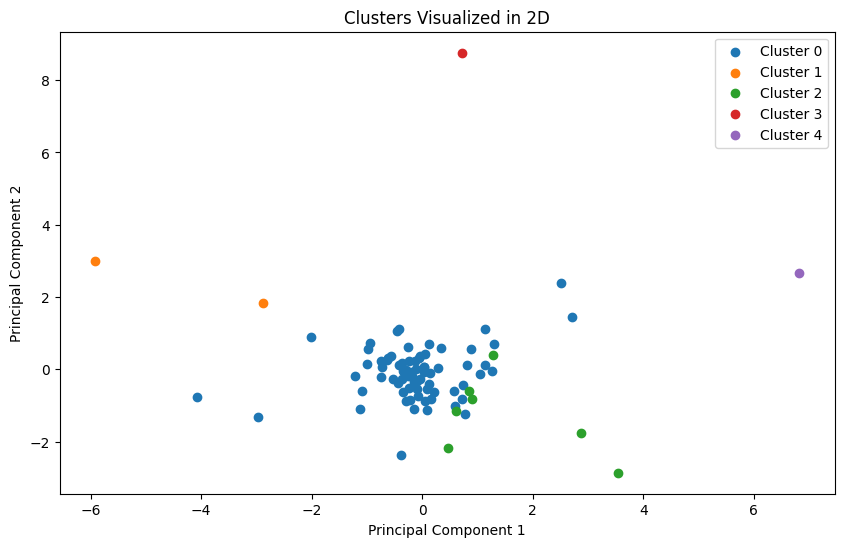

In [ ]:
#Performed Cluster visualization on the data above
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_coefficients_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['PC1'], df_pca[df_pca['Cluster'] == cluster]['PC2'], label=f'Cluster {cluster}')
plt.title('Clusters Visualized in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

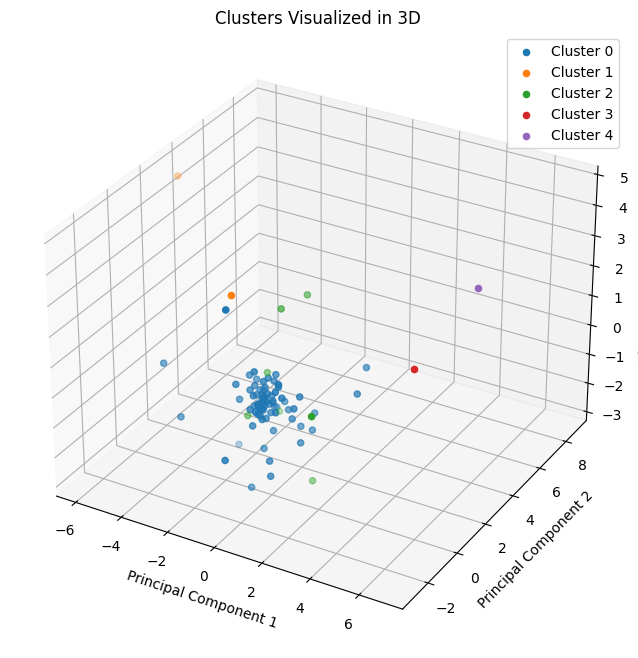

In [ ]:
from mpl_toolkits import mplot3d

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_coefficients_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = kmeans.labels_

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

for cluster in range(5):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    ax.scatter3D(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')

ax.set_title('Clusters Visualized in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()